In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

In [3]:
train2=os.listdir("/kaggle/input/dermnet/train")

In [4]:
train2

['Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Acne and Rosacea Photos',
 'Systemic Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Vascular Tumors',
 'Urticaria Hives',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Seborrheic Keratoses and other Benign Tumors',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Vasculitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Warts Molluscum and other Viral Infections']

In [5]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [6]:



cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [7]:
def data_dictionary():
    path_train="/kaggle/input/skindatasets/skin/train/"
    path_test="/kaggle/input/dermnet/train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [8]:
train=data_dictionary()

In [9]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(224,224))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


In [10]:
label=train['target']

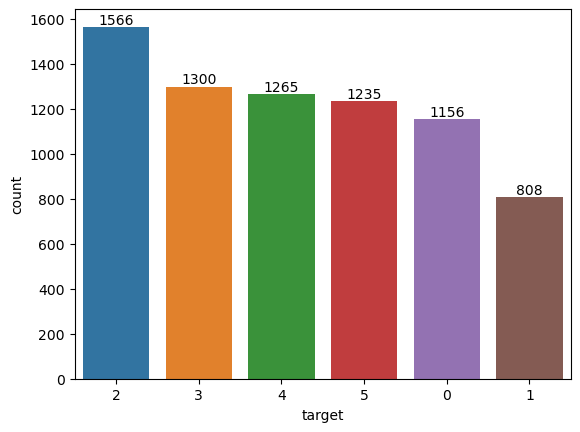

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);
abs_values = train['target'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

In [12]:
len(label)

7330

In [13]:
len(images)

7330

In [14]:
import numpy as np
import pandas as pd

In [15]:
data=np.array(images)


In [16]:
label=np.array(label)

In [17]:
data.shape

(7330, 224, 224, 3)

In [18]:
label.shape

(7330,)

In [19]:
!pip install sklearn_relief

In [20]:
# Base Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [21]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [22]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (224, 224, 3)) 

80134624/80134624 [==============================] - 0s 0us/step


In [23]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

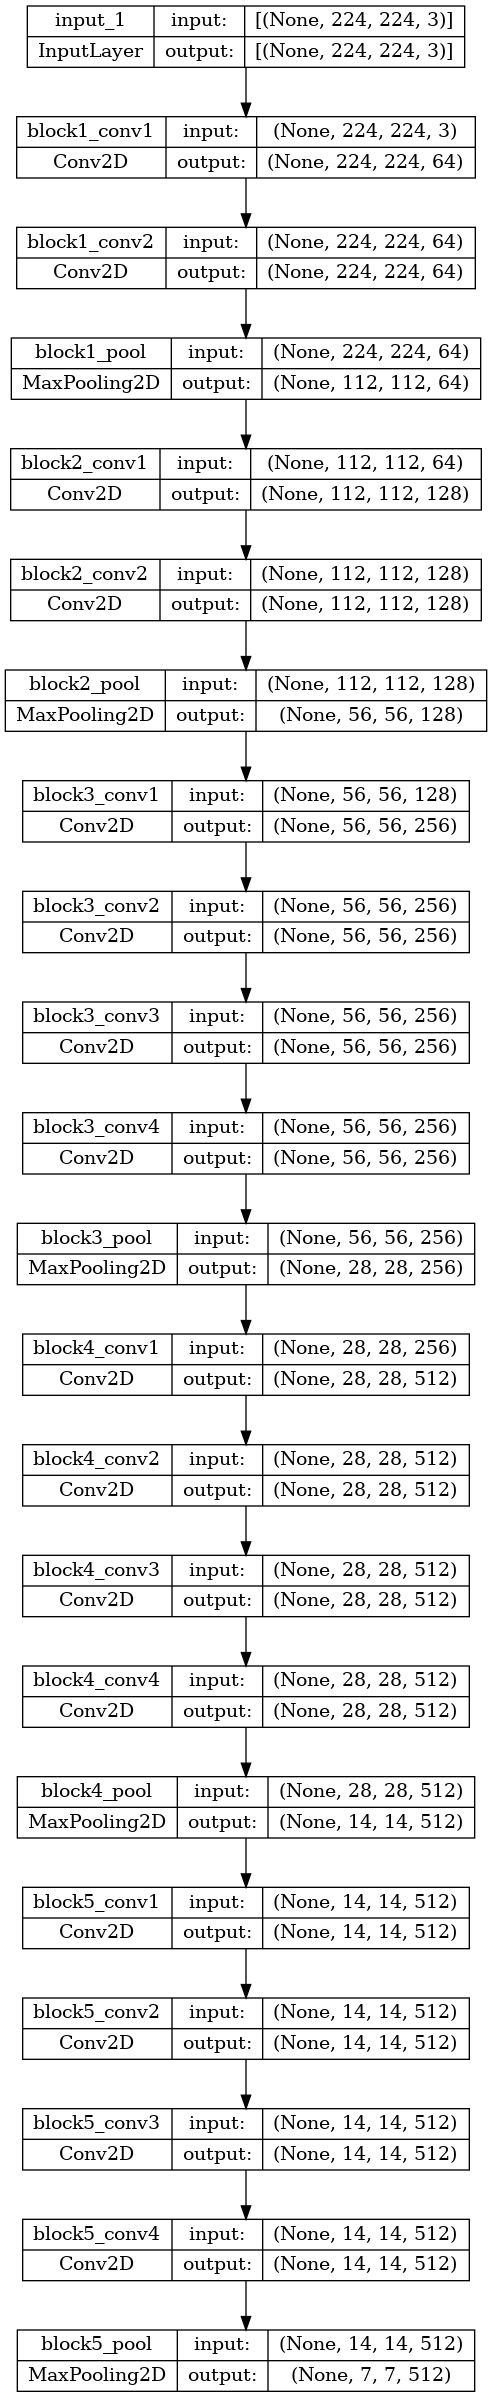

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [26]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [27]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [28]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 3)

In [31]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [32]:
label.shape


(7330, 6)

# ****#Evaluting the model multiple times

In [33]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    #features_train.shape
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
    history=model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=1) 
    #printing the train Accuracy
    print(history.history['accuracy']) 

    model.evaluate(x_test,y_test)

46/46 [==============================] - 11s 248ms/step
Epoch 1/100
184/184 [==============================] - 3s 5ms/step - loss: 2.6662 - accuracy: 0.7045
Epoch 2/100
184/184 [==============================] - 1s 5ms/step - loss: 0.4547 - accuracy: 0.8759
Epoch 3/100
184/184 [==============================] - 1s 5ms/step - loss: 0.3538 - accuracy: 0.9086
Epoch 4/100
184/184 [==============================] - 1s 5ms/step - loss: 0.1867 - accuracy: 0.9504
Epoch 5/100
184/184 [==============================] - 1s 5ms/step - loss: 0.1323 - accuracy: 0.9676
Epoch 6/100
184/184 [==============================] - 1s 5ms/step - loss: 0.2135 - accuracy: 0.9485
Epoch 7/100
184/184 [==============================] - 1s 5ms/step - loss: 0.1466 - accuracy: 0.9679
Epoch 8/100
184/184 [==============================] - 1s 5ms/step - loss: 0.2099 - accuracy: 0.9582
Epoch 9/100
184/184 [==============================] - 1s 5ms/step - loss: 0.2164 - accuracy: 0.9645
Epoch 10/100
184/184 [=============

**#finding the precision and recall for the given model!!
**

# #Printing the report****

In [34]:
from sklearn.metrics import classification_report

# Make predictions on test data
y_pred = model.predict(x_test)

# Convert predicted and true labels to binary (0/1) format
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred)
print(report)

46/46 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       224
           1       1.00      0.97      0.99       159
           2       1.00      1.00      1.00       315
           3       0.96      0.98      0.97       263
           4       1.00      0.97      0.99       246
           5       0.96      0.97      0.96       259

    accuracy                           0.98      1466
   macro avg       0.98      0.98      0.98      1466
weighted avg       0.98      0.98      0.98      1466



In [35]:

model.save('6claass.h5')

In [36]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np

# load the saved model
model = load_model('/kaggle/working/6claass.h5')

# load the image and preprocess it
img = Image.open('/kaggle/input/imagetest/acne.jpg') # replace with the correct image path
img = img.resize((224,224)) # resize to the input shape of the model
img_array = np.array(img)
img_array = img_array.astype('float32')
img_array = preprocess_input(img_array) # preprocess using the VGG16 preprocessing function
img_array = np.expand_dims(img_array, axis=0)

# extract features using the VGG16 model
vgg_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet')
features = vgg_model.predict(img_array)
features = features.reshape(features.shape[0], -1)

# predict the output
predictions = model.predict(features)

# interpret the output
class_names = ['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)


1/1 [==============================] - 0s 61ms/step
Predicted class: Acne and Rosacea Photos


In [37]:
import cv2
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('6claass.h5')

# Define the labels for the classes
class_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']

# Define a function to preprocess the input image
def preprocess_image(img):
    # Resize the image to match the input size of the model
    img = cv2.resize(img, (224, 224))
    # Convert the image to a numpy array and scale the pixel values to be between 0 and 1
    img = np.array(img) / 255.0
    # Add an extra dimension to the image to represent the batch size
    img = np.expand_dims(img, axis=0)
    return img

# Define a function to perform classification on a single frame
def classify_frame(frame):
    # Preprocess the frame
    img = preprocess_image(frame)
    # Perform classification on the frame
    predictions = model.predict(img)
    # Get the index of the class with the highest probability
    class_index = np.argmax(predictions)
    # Get the corresponding class label
    class_label = class_names[class_index]
    return class_label

# Define a function to capture frames from the laptop camera and perform classification in real-time
def live_classification():
    # Open the laptop camera
    cap = cv2.VideoCapture(0)
    while True:
        # Capture a frame from the camera
        ret, frame = cap.read()
        if not ret:
            break
        # Flip the frame horizontally to match the mirror-like view from the camera
        frame = cv2.flip(frame, 1)
        # Perform classification on the frame
        class_label = classify_frame(frame)
        # Draw the class label on the frame
        cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        # Show the frame
        cv2.imshow('Live Classification', frame)
        # Exit the loop if the 'q' key is pressed
        if cv2.waitKey(1) == ord('q'):
            break
    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()

# Start the live classification
live_classification()

[ WARN:0] global /tmp/pip-req-build-jpmv6t9_/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


# **using the second Artitecture Alexnet******

**This code uses a for loop to split the data and labels into training and testing sets three times.
After each iteration of the loop, the variables x_train, x_test, y_train, and y_test are updated with the new split data and labels. This loop is useful for creating multiple train-test splits for cross-validation purposes, to evaluate the performance of a machine learning model on different subsets of the data.**

In [ ]:
for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the input shape
input_shape = (224, 224, 3)

# Define the model
model = Sequential([
    Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, (5,5), strides=(1,1), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, (3,3), strides=(1,1), activation='relu', padding="same"),
    Conv2D(384, (3,3), strides=(1,1), activation='relu', padding="same"),
    Conv2D(256, (3,3), strides=(1,1), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()

**#when i used Adam optimizer i got accuracy =Test Accuracy: 21.49%**

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50)
#printing the train Accuracy
print(history.history['accuracy']) 

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
#printing the test Accuracy
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on test data
y_pred = model.predict(x_test)

# Convert predicted and true labels to binary (0/1) format
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred)
print(report)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **####3RD Architecture ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model with imagenet weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make all layers in the pre-trained model non-trainable
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the ResNet50 model as a layer to the new model
model.add(resnet_model)

# Add a flatten layer
model.add(Flatten())

# Add a dense layer with 256 units and relu activation
model.add(Dense(256, activation='relu'))

# Add an output layer with the number of classes and softmax activation
model.add(Dense(6, activation='softmax'))

# Compile the model with Adam optimizer and categorical_crossentropy loss
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50)
# Print the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('Training accuracy:', train_acc)
print('Testing accuracy:', val_acc)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Testing accuracy')
plt.legend()
plt.show()


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(resnet_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

# Print the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('Training accuracy:', train_acc)
print('Testing accuracy:', val_acc)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred = model.predict(x_test)

# Convert the predicted probabilities into predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels into binary form
y_test_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
plot_confusion_matrix(model, x_test, y_test_labels, display_labels=classes, cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [ ]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')